In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import time

## Serie A

Below is an image of the end-of-season standings. Take a moment to scan over the table and then let's get into our analysis.

<img src="Tables/SerieATable.png">

In [3]:
#data cleaning
df = pd.read_csv("TopGoals/serieATopGoals.csv")
df = df.head(n=20)
df = df.drop(columns=['Unnamed: 0', 'YC', 'RC', 'F', 'OFF', 'HG', 'KG'])
df.rename(columns={'STANDARD':'Name', 'GP': 'Games', 'GF':'Goals', 'A':'Assists', 'SOG':'Shots on Goal', 'S':'Total Shots'}, inplace=True)
for i in range(20):
    if(df.at[i, 'Name'].split()[1] == df.at[i, 'Name'].split()[2]):
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1]
    else:
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1] + df.at[i, 'Name'].split()[2]
    df.at[i, 'Goals/Game'] = (df.at[i, 'Goals']/df.at[i, 'Games'])
#print(df)
#create 2 new columns for shooting accuracy and coversion rate
#shooting accuracy is given by (shots on goal/total shots)*100%
#conversion rate is given by (goals/shots on goal)*100%
for i in range(20):
    df.at[i, 'Shooting Accuracy(%)'] = (df.at[i, 'Shots on Goal']/df.at[i, 'Total Shots'])*100
    df.at[i, 'Conversion Rate(%)'] = (df.at[i, 'Goals']/df.at[i, 'Shots on Goal'])*100
print(df)

          Name  Games  Goals  Assists  Shots on Goal  Total Shots  Goals/Game  \
0     Atalanta     38     77       58            224          622    2.026316   
1       Napoli     38     74       55            244          700    1.947368   
2     Juventus     38     70       41            200          591    1.842105   
3         Roma     38     66       42            227          615    1.736842   
4    Sampdoria     38     60       39            183          483    1.578947   
5   InterMilan     38     57       39            205          619    1.500000   
6        Lazio     38     56       34            199          605    1.473684   
7      ACMilan     38     55       34            204          576    1.447368   
8     Sassuolo     38     53       34            166          507    1.394737   
9       Torino     38     52       29            180          502    1.368421   
10      Empoli     38     51       34            160          444    1.342105   
11     Bologna     38     48

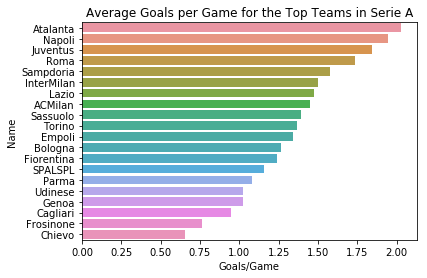

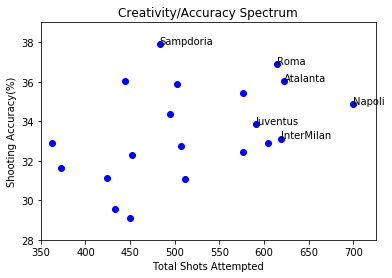

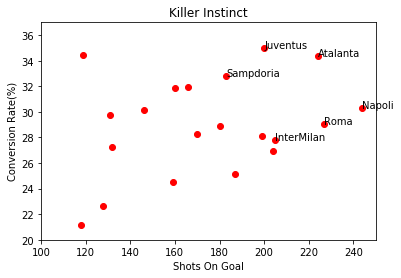

In [8]:
#visualization of top scorers per game
#df1 = df.sort_values(['Goals/Game'])
bar1 = sns.barplot(x='Goals/Game', y='Name', data=df)
#bar1.set_xticklabels(bar1.get_xticklabels(),rotation=90)
plt.title('Average Goals per Game for the Top Teams in Serie A')
plt.show()

plt.plot(df["Total Shots"], df["Shooting Accuracy(%)"], 'bo')
plt.axis([350, 725, 28, 39])
plt.title('Creativity/Accuracy Spectrum')
plt.xlabel("Total Shots Attempted")
plt.ylabel("Shooting Accuracy(%)")
for i in range(6):
    plt.annotate(df.at[i, 'Name'], xy=(df.at[i,'Total Shots'], df.at[i, 'Shooting Accuracy(%)']))
plt.show()

plt.plot(df["Shots on Goal"], df["Conversion Rate(%)"], 'ro')
plt.axis([100, 250, 20, 37])
plt.title('Killer Instinct')
plt.xlabel("Shots On Goal")
plt.ylabel("Conversion Rate(%)")
for i in range(6):
    plt.annotate(df.at[i, 'Name'], xy=(df.at[i,'Shots on Goal'], df.at[i, 'Conversion Rate(%)']))
plt.show()

### Analysis

From the first graphic, we can see that two teams (Manchester City and Liverpool) produce significantly more goals than the rest of the league. Over the course of a 38-game season, this amounts to both of these teams having at least 16 goals more than the next closest team. Comparing these goal-scoring charts with the end-of-season standings, we can see that they are closely related with higher scoring teams generally ending the season in better positions. In addition, there is another decently sized divide between the top six and the rest of the league. The top six teams in the goal-scoring charts make up what pundits call the "Big 6" of the Premier League and generally finish in the top six of the league on a yearly basis.

From this point forward, we will only be looking at the "Big 6" as their statistics are more comparable and thus makes for simpler analysis. However, I have included the rest of the teams in the graphics to give context about how prolific these teams are and to avoid misleading readers.

Looking at the second and third graphs, we can see that Manchester City top both the "Total Shots" and the "Shots on Goal" statistics. Despite being in the middle of the pack for shooting accuracy and conversion rate among the "Big 6", the sheer number of shots taken and chances created lead to their superiority in goals scored, topping the league with 95 goals. Similarly, Liverpool have the second highest shooting accuracy and conversion rate. Coupled with the third highest number of shots taken, it is no surprise that Liverpool comes second in the goalscoring charts with 89 goals over the season.

On the other hand, let's take a look at Manchester United and Chelsea; two teams that struggled for goals compared to the rest of the top six. While they each boast superiority in one measure (shot accuracy for Manchester United and total shots attempted for Chelsea), they lack other vital parts of goal scoring. Despite having the highest shooting accuracy in the league, Manchester United have a below average conversion rate when compared to the rest of the league (also the lowest conversion rate of any top six team). Similarly, Chelsea attempt the second most shots in the league but have a below average shooting accuracy when compared to the rest of the league (also the lowest shooting accuracy of any top six team).

Even though this season led to a primarily two-horse race for the Premier League Title, all the teams in the "Big 6" still have a considerable say in deciding who comes out on top. As such, there are very few dynasty periods in which one or two teams consistently win the league and so it is no surprise that experts call it the most competitive league.